# <u> Sentiment Analysis <u>

### <u> To implement a Business Sentiment Analysis Model that helps to overcome the challenges of identifying the sentiments of the clients towards a certain business policy. <u>

### Importing the relevant libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [45]:
d1 = pd.read_excel("C:\\Users\DELL\Downloads\Sentiment_Analysis _All_Final\Train data set.xlsx")
data = d1

In [53]:
data.head()

,Category,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [55]:
data['Sentiment'] = data['Category']
data['Statement'] = data['Text']

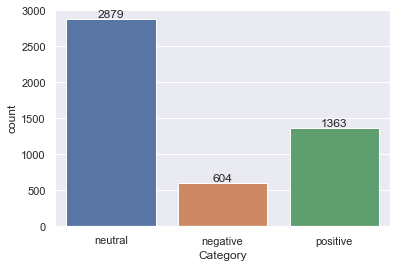

In [49]:
 # count plot on single categorical variable
plot = sns.countplot(x ='Category', data = d1)
for i in plot.containers:
    plot.bar_label(i,)
# Show the plot
plt.show()

In [38]:
sent_list = list(d1['Category'].value_counts())

In [39]:
 d1['Category'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

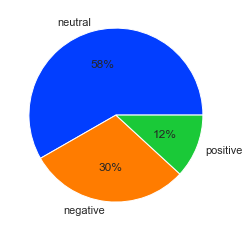

In [47]:
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(sent_list, labels = d1['Category'].unique(), colors = colors, autopct='%.0f%%')
plt.show()

### Data Preprocessing and Stemming

In [50]:
import re
#re or Regular Expression allows us to look up strings and other data.
import nltk
# Natural Language Toolkit is one of the most commonly library for Natural Language Processing problems.
# It provides functions to perform all the basic tasks that are involved in NLP, like Tokenisation, removal of stopwords, etc.
nltk.download('stopwords')
# After succesful download, we're importing all the stopwords to facilitate the process of their removal from our data.

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
# This command allows us to perform stemming. Stemming involves removing verbal different forms of the same word and substituting
# them with one singular form, for example, like, liked and liking all may be present in our textual data which will all be 
# replaced by "like."


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
all_stopwords = stopwords.words('english')

# filtering the stop words so that it doesn't contain the neagtive words which might be helpful in our sentiment analysis

filtered_stopwords = [i for i in all_stopwords if i not in ('no', 'nor', 'not','shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'don', "don't",'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't")  ]
filtered_stopwords, len(filtered_stopwords)

(['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further',
  'th

In [57]:
corpus = []
# We're initially definig it to be empty as we intend to store our preprocessed data in this class after performing the
# suitable and necessary functions.

for i in range(0, 4846):
# "4846" is used for our loop as it's the number of columns in our data and we want our loop to iterate over all columns

  review = re.sub('[^a-zA-Z]',' ', data['Text'][i])
# This statement stores all the statements in "Reviews". Any character that is neither a lower case or an upper case
# English alphabet in the "Statements" in our dataset is replaced or subbed by an empty space.
    
  review = review.lower()
# This command turns all the textual data into lower case alphabets.

  review = review.split()
# split() method in Python split a string into a list of strings after breaking the given string by the specified separator.

  ps = SnowballStemmer('english')
# We intend to perform Stemming with this command line and import the fucntion for the same.

  review = [ps.stem(word) for word in review if not word in set(filtered_stopwords)]
  review = ' '.join(review)
  corpus.append(review)  

# This command stems the words which are not present in our defined stopwords. It further joins all those words back in
#''' "review" and adds a space between them. 
# Finally, all this preprocessed data is added back to our "corpus" defined earlier.'''

'''print(sno.stem("operating"))
print(sno.stem("operated"))
print(sno.stem("operation"))
print(sno.stem("operate"))'''

'print(sno.stem("operating"))\nprint(sno.stem("operated"))\nprint(sno.stem("operation"))\nprint(sno.stem("operate"))'

In [58]:
corpus

['accord gran compani no plan move product russia although compani grow',
 'technopoli plan develop stage area no less squar meter order host compani work comput technolog telecommun statement said',
 'intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report',
 'new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit',
 'financ aspocomp growth aspocomp aggress pursu growth strategi increas focus technolog demand hdi print circuit board pcbs',
 'last quarter componenta net sale doubl eur eur period year earlier move zero pre tax profit pre tax loss eur',
 'oper profit rose eur mn eur mn correspond period repres net sale',
 'oper profit total eur mn eur mn repres net sale',
 'teliasonera tlsn said offer line strategi increas ownership core busi hold would strengthen eesti telekom offer custom',
 'stora enso norsk skog 

### Lemmatizing

_A lemma is a word that represents a whole group of words, and that group of words is called a lexeme.
For example, if we were to look up the word “blending” in a dictionary, we’d need to look at the entry for “blend,” but we would also find “blending” listed in that entry. In this example, “blend” is the lemma, and “blending” is part of the lexeme. So when we lemmatize a word, you are reducing it to its lemma._

In [59]:

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
#  This command imports the relevant libraries and creates an instance for lemmatizing
corpus_l = []
for i in range(0, 4846):
  review = re.sub('[^a-zA-Z]', ' ', data['Text'][i])
  review = review.lower()
  review = review.split()
  ps = SnowballStemmer('english')
  review = [lemmatizer.lemmatize(word) for word in review if not word in set(filtered_stopwords)]
  review = ' '.join(review)
  corpus_l.append(review)
  

In [60]:
# We have defined a different "corpus_l" for our lemmatized outputs.
corpus_l
#There's noticeable difference between the two results, and we'll use both results for our model.

['according gran company no plan move production russia although company growing',
 'technopolis plan develop stage area no le square meter order host company working computer technology telecommunication statement said',
 'international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported',
 'new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability',
 'financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs',
 'last quarter componenta net sale doubled eur eur period year earlier moved zero pre tax profit pre tax loss eur',
 'operating profit rose eur mn eur mn corresponding period representing net sale',
 'operating profit totalled eur mn eur mn representing net sale',
 'teliasonera tlsn 

##### Since lemmatization is better than stemming in making the sense of a word we have proceeded with lemmatization

### Building bag of words model after applying Lemmatization

In [61]:
# Using the Bag of Words approach, we'll vectorize our textual data to apply classification model such as SVC on it.
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
cv = CountVectorizer(max_features = 1500)
#The CountVectorizer will select the words/features/terms which occur the most frequently. It takes absolute values so if you set the ‘max_features = 3’, it will select the 3 most common words in the data
y_l = data["Sentiment"]         # Finishing the vectorization process
X_l = cv.fit_transform(corpus_l).toarray() # # For our lemmatized output

In [63]:
# After applying bag of words model, our final data (Text and Sentiments) looks like 
print(X_l,y_l)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 0        neutral
1        neutral
2       negative
3       positive
4       positive
          ...   
4841    negative
4842    positive
4843     neutral
4844    negative
4845    negative
Name: Sentiment, Length: 4846, dtype: object


In [64]:
## Mapping our sentiments to numerical values to build the model
y_l = y_l.map({'positive': 0, 'neutral': 1, 'negative': 2})
y_l

0       1
1       1
2       2
3       0
4       0
       ..
4841    2
4842    0
4843    1
4844    2
4845    2
Name: Sentiment, Length: 4846, dtype: int64

In [65]:
# Splitting the data into train set and test set 
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size = 0.20, random_state = 365)

In [66]:
y_train_l

2552    1
448     0
4789    1
142     0
2575    1
       ..
4762    2
4425    1
226     0
428     1
2740    1
Name: Sentiment, Length: 3876, dtype: int64

### <u> Model Deployment <u>

## Naive Bayes

In [67]:
# Splitting the data into train set and test set 
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size = 0.20, random_state = 365)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_l, y_train_l)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test_l)

In [74]:
# Testing Classification Report
cm_nb_test = confusion_matrix(y_test_l, y_pred)
print(cm_nb_test),
print(classification_report(y_test_l, y_pred))

[[163  40  77]
 [242 208 113]
 [ 32  16  79]]
              precision    recall  f1-score   support

           0       0.37      0.58      0.45       280
           1       0.79      0.37      0.50       563
           2       0.29      0.62      0.40       127

    accuracy                           0.46       970
   macro avg       0.48      0.52      0.45       970
weighted avg       0.60      0.46      0.48       970



In [78]:
# Training Classification Report 
y_nb_train = gnb.predict(X_train_l)
cm_nb_train = confusion_matrix(y_train_l, y_nb_train)
print(cm_nb_train),
print(classification_report(y_train_l, y_nb_train))

[[ 779    0  304]
 [1020  862  434]
 [   0    0  477]]
              precision    recall  f1-score   support

           0       0.43      0.72      0.54      1083
           1       1.00      0.37      0.54      2316
           2       0.39      1.00      0.56       477

    accuracy                           0.55      3876
   macro avg       0.61      0.70      0.55      3876
weighted avg       0.77      0.55      0.54      3876



### Support Vector Classifier

In [79]:
from sklearn.svm import SVC
classifier_SS = SVC(kernel = 'rbf', random_state = 0)
classifier_SS.fit(X_train_l, y_train_l)

SVC(random_state=0)

#### SVC- Test Data Predictions

In [80]:
from sklearn.metrics import confusion_matrix, classification_report
y_svc_test = classifier_SS.predict(X_test_l)
cm_svc_test = confusion_matrix(y_test_l, y_svc_test)
print(cm_svc_test),
print(classification_report(y_test_l, y_svc_test))

[[108 167   5]
 [  9 551   3]
 [ 30  67  30]]
              precision    recall  f1-score   support

           0       0.73      0.39      0.51       280
           1       0.70      0.98      0.82       563
           2       0.79      0.24      0.36       127

    accuracy                           0.71       970
   macro avg       0.74      0.53      0.56       970
weighted avg       0.72      0.71      0.67       970



#### SVC- Train Data Predictions

In [81]:
y_svc_train = classifier_SS.predict(X_train_l)
cm_svc_train = confusion_matrix(y_train_l, y_svc_train)
print(cm_svc_train),
print(classification_report(y_train_l, y_svc_train))

[[ 838  232   13]
 [   6 2305    5]
 [  24  116  337]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1083
           1       0.87      1.00      0.93      2316
           2       0.95      0.71      0.81       477

    accuracy                           0.90      3876
   macro avg       0.93      0.83      0.87      3876
weighted avg       0.91      0.90      0.89      3876



### Above procedure result in clearly overfitting

__After some hit and trails, we have obtained optimal values for our parameters which eliminate the overfitting__

In [82]:
# Testing 
opt_svc = SVC(kernel = 'rbf', C = 10,  gamma = 0.001)
opt_svc.fit(X_train_l, y_train_l)
opt_svc_test = opt_svc.predict(X_test_l)
print(classification_report(y_test_l, opt_svc_test))

              precision    recall  f1-score   support

           0       0.65      0.31      0.42       280
           1       0.67      0.98      0.80       563
           2       0.86      0.15      0.26       127

    accuracy                           0.68       970
   macro avg       0.73      0.48      0.49       970
weighted avg       0.69      0.68      0.62       970



In [83]:
# Training
opt_svc_train = opt_svc.predict(X_train_l)
print(classification_report(y_train_l, opt_svc_train))

              precision    recall  f1-score   support

           0       0.73      0.36      0.49      1083
           1       0.70      0.98      0.82      2316
           2       0.96      0.18      0.30       477

    accuracy                           0.71      3876
   macro avg       0.80      0.51      0.54      3876
weighted avg       0.74      0.71      0.66      3876



### Better than what we got earlier but still we can improve our model.

### Building TF-IDF model after applying Lemmatization

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv_tfidf = TfidfVectorizer()
X_l_tf = cv_tfidf.fit_transform(corpus_l).toarray()

In [96]:
X_l_tf.shape

(4846, 8104)

In [97]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l_tf, y_l, test_size = 0.20, random_state = 365)

### SVM

#### SVC- Test Data Predictions

In [92]:
from sklearn.svm import SVC
classifier_SS = SVC(kernel = 'rbf', random_state = 0)
classifier_SS.fit(X_train_l, y_train_l)
y_svc_test = classifier_SS.predict(X_test_l)

In [93]:
# Testing 
cm_svc_test = confusion_matrix(y_test_l, y_svc_test)
print(cm_svc_test),
print(classification_report(y_test_l, y_svc_test))

[[100 174   6]
 [ 12 548   3]
 [ 22  70  35]]
              precision    recall  f1-score   support

           0       0.75      0.36      0.48       280
           1       0.69      0.97      0.81       563
           2       0.80      0.28      0.41       127

    accuracy                           0.70       970
   macro avg       0.74      0.54      0.57       970
weighted avg       0.72      0.70      0.66       970



In [94]:
# Training
y_svc_train = classifier_SS.predict(X_train_l)
cm_svc_train = confusion_matrix(y_train_l, y_svc_train)
print(cm_svc_train),
print(classification_report(y_train_l, y_svc_train))

[[ 997   72   14]
 [   4 2308    4]
 [  16   50  411]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1083
           1       0.95      1.00      0.97      2316
           2       0.96      0.86      0.91       477

    accuracy                           0.96      3876
   macro avg       0.96      0.93      0.94      3876
weighted avg       0.96      0.96      0.96      3876



_The training accuracy is significantly higher than the test accuracy. Hence, our __model is overfit__. We'll overcome this drawback by performing hyperparameter tuning._

### Hyperparameter tunning using GridSearchCV in order to prevent overfitting 

**Grid search is commonly used as an approach to hyper-parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.**

The main idea behind it is to create a grid of hyper-parameters and just try all of their combinations. (A function that runs a loop for testing combinations of different value of parameters, to obtain optimal results.)

GridSearchCV takes a dictionary that describes the parameters that could be tried on a model to train it. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.


C (Regularisation): C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.

**When C is high it will classify all the data points correctly, also there is a chance to overfit.**

Gamma: It defines how far influences the calculation of plausible line of separation.
When gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.
So, higher the gamma value the more exact fit can be obtained in the training data set.

**Increasing gamma might lead to overfitting as the classifier tries to perfectly fit the training data.**


In [98]:
#Import GridsearchCV from Scikit Learn
from sklearn.model_selection import GridSearchCV

# Create a dictionary called param_grid and fill out some parameters for C, gamma with the Kernel "rbf"
param_grid = {'C': [0.001, 0.1, 1, 10, 100],
              'gamma': [ 0.001, 0.01, 0.1, 1, 10],
              'kernel': ['rbf']}

In [101]:
# Create a GridSearchCV object and fit it to the training data
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 3)
 
# fitting the model for grid search
grid.fit(X_train_l, y_train_l)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.598 total time=  41.7s
[CV 2/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.598 total time=  42.0s
[CV 3/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.598 total time=  36.6s
[CV 1/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.598 total time=  38.6s
[CV 2/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.598 total time=  37.5s
[CV 3/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.598 total time=  38.3s
[CV 1/3] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.598 total time=  38.0s
[CV 2/3] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.598 total time=  38.4s
[CV 3/3] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.598 total time=  37.4s
[CV 1/3] END ......C=0.001, gamma=1, kernel=rbf;, score=0.598 total time=  40.3s
[CV 2/3] END ......C=0.001, gamma=1, kernel=rbf;, score=0.598 total time=  39.5s
[CV 3/3] END ......C=0.001, gamma=1, kernel=rbf;

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=3)

In [100]:
#Find the optimal parameters
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


**Precision**

Precision is the ability of a classifier not to label an instance positive that is actually negative. 
For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

Precision:- Accuracy of positive predictions.
Precision = TP/(TP + FP)

**Recall**

Recall is the ability of a classifier to find all positive instances. 
For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.


Recall:- Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

**f1-score**

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. 
F1 scores are lower than accuracy measures as they embed precision and recall into their computation.

The weighted average of F1 can be used to compare classifier models but not the global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Support** 

Support is the number of actual occurrences of the class in the specified dataset. 
Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing.


In [104]:
##Test Data
grid_predictions_test = grid.predict(X_test_l)
print(classification_report(y_test_l, grid_predictions_test))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       280
           1       0.77      0.91      0.83       563
           2       0.75      0.46      0.57       127

    accuracy                           0.75       970
   macro avg       0.74      0.65      0.68       970
weighted avg       0.75      0.75      0.74       970



In [105]:
## Train Data
grid_predictions_train = grid.predict(X_train_l)
print(classification_report(y_train_l, grid_predictions_train))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1083
           1       0.97      0.99      0.98      2316
           2       0.92      0.94      0.93       477

    accuracy                           0.96      3876
   macro avg       0.95      0.95      0.95      3876
weighted avg       0.96      0.96      0.96      3876



 We'll now calculate the accuracies using some other kernels

In [64]:
classifier_SSL = SVC(kernel = 'linear', C = 10, gamma = 0.01, random_state = 0)
classifier_SSL.fit(X_train_l, y_train_l)
y_svc_lin = classifier_SSL.predict(X_test_l)
cm_svc_lin = confusion_matrix(y_test_l, y_svc_lin)
print(cm_svc_lin),
print(classification_report(y_test_l, y_svc_lin))

[[158  84  23]
 [117 439  33]
 [ 22  35  59]]
              precision    recall  f1-score   support

           0       0.53      0.60      0.56       265
           1       0.79      0.75      0.77       589
           2       0.51      0.51      0.51       116

    accuracy                           0.68       970
   macro avg       0.61      0.62      0.61       970
weighted avg       0.68      0.68      0.68       970



In [65]:
classifier_SSL = SVC(kernel = 'sigmoid', C = 10, gamma = 0.01, random_state = 0)
classifier_SSL.fit(X_train_l, y_train_l)
y_svc_sig = classifier_SSL.predict(X_test_l)
cm_svc_sig = confusion_matrix(y_test_l, y_svc_sig)
print(cm_svc_sig),
print(classification_report(y_test_l, y_svc_sig))

[[ 64 201   0]
 [ 11 578   0]
 [ 37  79   0]]
              precision    recall  f1-score   support

           0       0.57      0.24      0.34       265
           1       0.67      0.98      0.80       589
           2       0.00      0.00      0.00       116

    accuracy                           0.66       970
   macro avg       0.42      0.41      0.38       970
weighted avg       0.57      0.66      0.58       970



C:\Users\Apoorv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Apoorv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Apoorv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
classifier_SSL = SVC(kernel = 'poly', C = 10, gamma = 0.01, random_state = 0)
classifier_SSL.fit(X_train_l, y_train_l)
y_svc_poly = classifier_SSL.predict(X_test_l)
cm_svc_poly = confusion_matrix(y_test_l, y_svc_poly)
print(cm_svc_poly),
print(classification_report(y_test_l, y_svc_poly))

[[  0 265   0]
 [  0 589   0]
 [  0 116   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       265
           1       0.61      1.00      0.76       589
           2       0.00      0.00      0.00       116

    accuracy                           0.61       970
   macro avg       0.20      0.33      0.25       970
weighted avg       0.37      0.61      0.46       970



C:\Users\Apoorv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Apoorv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Apoorv\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
from sklearn.metrics import accuracy_score
Summary = pd.DataFrame()
Summary['Kernel'] = ['rbf', 'Linear', 'Sigmoid', 'Poly']
Summary['Accuracy'] = [accuracy_score(y_test_l, grid_predictions_test), accuracy_score(y_test_l, y_svc_lin), accuracy_score(y_test_l, y_svc_sig), accuracy_score(y_test_l, y_svc_poly)]
Summary

,Kernel,Accuracy
0,rbf,0.694845
1,Linear,0.676289
2,Sigmoid,0.661856
3,Poly,0.607216


__Clearly, the "rbf" kernel gives the best accuracy, and "rbf" and "linear" give the best F1 Scores.__

### K-Nearest Neighbors

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=20, metric = 'minkowski', weights = 'uniform')
#These parameter values were obtained after using the hyperparameter tuning methods.
knn_model.fit(X_train_l,y_train_l)

KNeighborsClassifier(n_neighbors=20)

In [83]:
predictions=knn_model.predict(X_test_l)
from sklearn import metrics
print(metrics.confusion_matrix(y_test_l,predictions))

[[ 62 196   7]
 [ 12 576   1]
 [ 19  77  20]]


In [84]:
print(metrics.classification_report(y_test_l,predictions))

              precision    recall  f1-score   support

           0       0.67      0.23      0.35       265
           1       0.68      0.98      0.80       589
           2       0.71      0.17      0.28       116

    accuracy                           0.68       970
   macro avg       0.69      0.46      0.48       970
weighted avg       0.68      0.68      0.61       970



#### n_neighbours

It is the value of k which indicates the count of the nearest neighbors.

#### Weights

**Uniform** here means hat tall neighbors get an equally weighted “vote” about an observation’s class.

**Distance** here weighs each observation’s “vote” by its distance from the observation we are classifying.

#### Metric


**Minkowski distance** is a distance measured between two points in N-dimensional space. It is basically a generalization of the Euclidean distance and the Manhattan distance.

**Euclidean distance** is the distance between two points in Euclidean space is the length of a line segment between the two points.

**Manhattan distance** is a distance metric between two points in a N dimensional vector space. It is the sum of the lengths of the projections of the line segment between the points onto the coordinate axes. 
In simple terms, it is the sum of absolute difference between the measures in all dimensions of two points.



### Decision Trees

In [90]:
## Test Data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
classifier_t = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth =  9, max_leaf_nodes= 30, min_samples_leaf = 15, min_samples_split= 15)
#The paramter values were obtained after hyperparameter tuning.
classifier_t.fit(X_train_l, y_train_l)
y_tree = classifier_t.predict(X_test_l)
print(classification_report(y_test_l, y_tree))

              precision    recall  f1-score   support

           0       0.56      0.32      0.41       265
           1       0.71      0.95      0.81       589
           2       0.52      0.11      0.18       116

    accuracy                           0.68       970
   macro avg       0.60      0.46      0.47       970
weighted avg       0.64      0.68      0.63       970



In [91]:
## Train Data
y_tree_tr = classifier_t.predict(X_train_l)
print(classification_report(y_train_l, y_tree_tr))

              precision    recall  f1-score   support

           0       0.70      0.36      0.47      1098
           1       0.70      0.96      0.81      2290
           2       0.78      0.25      0.38       488

    accuracy                           0.70      3876
   macro avg       0.73      0.52      0.55      3876
weighted avg       0.71      0.70      0.66      3876



### <u> Summary & Results <u>

We have performed __Stemming__ and __Lemmatizing__ for our data. 
Because of more easily interpretable results obtained through Lemmatizing, we have used its results for further processes.

We have built a __Bag Of Words__ model and applied the __Support Vector Classifier__ on it, and obtained the following results after eliminating the overfit.


In [107]:
print(classification_report(y_test_l, opt_svc_test))

              precision    recall  f1-score   support

           0       0.68      0.34      0.45       265
           1       0.71      0.98      0.82       589
           2       0.76      0.16      0.27       116

    accuracy                           0.71       970
   macro avg       0.72      0.49      0.51       970
weighted avg       0.71      0.71      0.65       970



Next, we have used the __TF-IDF__ model on the lemmatized data.
We have used __Support Vector Classifier__, __K-Nearest Neighbours__, __Decision Trees__ and obtained the following results

In the __Support Vector Classifier__, after performing the tuning, the "rbf" kernel gives us the best results, given as- 

In [93]:
print(classification_report(y_test_l, grid_predictions_test))

              precision    recall  f1-score   support

           0       0.69      0.31      0.43       265
           1       0.69      0.97      0.81       589
           2       0.74      0.15      0.24       116

    accuracy                           0.69       970
   macro avg       0.71      0.48      0.50       970
weighted avg       0.70      0.69      0.64       970



In __KNN__, we obtain the following results - 

In [95]:
print(metrics.classification_report(y_test_l,predictions))

              precision    recall  f1-score   support

           0       0.67      0.23      0.35       265
           1       0.68      0.98      0.80       589
           2       0.71      0.17      0.28       116

    accuracy                           0.68       970
   macro avg       0.69      0.46      0.48       970
weighted avg       0.68      0.68      0.61       970



In __Decision Trees__, we get the following results-

In [104]:
print(classification_report(y_test_l, y_tree))

              precision    recall  f1-score   support

           0       0.56      0.32      0.41       265
           1       0.71      0.95      0.81       589
           2       0.52      0.11      0.18       116

    accuracy                           0.68       970
   macro avg       0.60      0.46      0.47       970
weighted avg       0.64      0.68      0.63       970



In [105]:
Results = pd.DataFrame()
Results['Model'] = ['SVC', 'KNN', 'Decision_Trees']
Results['Accuracy'] = accuracy_score(y_test_l, grid_predictions_test), accuracy_score(y_test_l,predictions), accuracy_score(y_test_l, y_tree)
Results

,Model,Accuracy
0,SVC,0.694845
1,KNN,0.678351
2,Decision_Trees,0.679381


F1 Scores, Precision and Recall of each model and a more detailed report is also given above.

__The SVC Bag of Words model gives the best results followed by the TF-IDF SVC Model, both based on the "rbf" kernel__

_Our confusion matrix and F1 Scores also reveal that our __model is good with predicting "Neutral" (1) statements__ present in our data, but is __not efficient at predicting "Negative" (0) and "Positive" (2) statments__ because of the imbalance present in our data._